# Marvel Superheroes - Group 14

## Group Members
* Simone Facchiano
* Stefano Lacommare
* Jonas Barth

# Index

* [Graph Setup](#Graph-Setup)
    * [Collaborative Graph](#Collaborative-Graph)
    * [Hero-Comic Graph](#Hero-Comic-Graph)
* [Hero Graph Features](#hero-graph-features)
    * [Functionality](#1.-Functionality)
    * [Visualisation](#1.-Visualisation)
* [Find Top Superheroes](#Find-Top-Superheroes)
    * [Functionality](#2.-Functionality)
    * [Visualisation](#2.-Visualisation)
* [Shortest Ordered Route](#shortest-ordered-route)
    * [Functionality](#3-Functionality)
    * [Visualisation](#3-Visualisation)
* [Disconnecting Graphs](#disconnecting-graphs)
    * [Functionality](#4.-Functionality)
    * [Visualisation](#4.-Visualisation)
* [Exctracting Communities](#extracting-communities)
    * [Functionality](#5-Functionality)
    * [Visualisation](#5-Visualisation)

Turn off the logging messages in the notebook

In [1]:
import logging, sys
logging.disable(sys.maxsize)

# Graph Setup

## Collaborative Graph

In [2]:
import backend.graph.collaborative as collaborative

collab_graph, collab_graph_type = collaborative.create_from(data='data/hero-network.csv')

## Hero-Comic Graph

In [3]:
import backend.graph.hero_comic as hero_comic

hero_comic_graph, hero_comic_graph_type = hero_comic.create_from(nodes='data/nodes.csv', edges='data/edges.csv')    

# Controller
We create **one** controller **per graph**. The [controller class](backend/controller.py) has a `run` method that receives:
- names of functionalities
- `top_n` for the top N heroes to consider
- a number of keyword arguments that depend on the functionality. 

The `run` method runs the functionality on the graph that is assigned to the class and returns the result.

In [4]:
from backend import Controller

collab_controller = Controller(collab_graph)
hero_comic_controller = Controller(hero_comic_graph)

# Features

## 1. Functionality
The `features` method will return a [GraphFeatures](backend/describe/graph) instance that contains:
- the graph type of the graph.
- the number of nodes in the graph.
- a set of hero collaboration.
- a list of Comic classes that with information about the number of heroes inside them.
- the density of the graph.
- the distribution of degrees across the graph.
- the average degree in the graph.
- a set of hubs in the graph.
- the mode of the graph, whether it is sparse or dense.

In [5]:
collab_features = collab_controller.run('features', top_n=25, graph_type=collab_graph_type)
hero_comic_features = hero_comic_controller.run('features', top_n=25, graph_type=hero_comic_graph_type)

## 1. Visualisation

# Find Top Superheroes

## 2. Functionality

In [6]:
metric = 'betweenness_centrality'
graph_metrics, node_metrics = collab_controller.run('metrics', top_n=50, node='WOLVERINE/LOGAN', metric=metric)

## 2. Visualisation

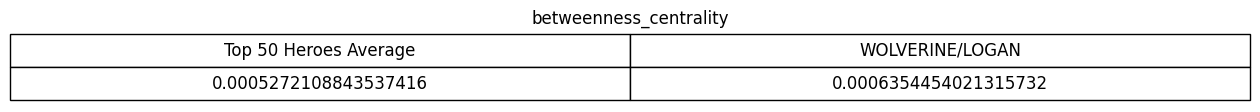

In [7]:
from frontend import metrics

metrics(graph_metrics=graph_metrics, node_metrics=node_metrics, metric=metric)

# Disconnecting Graph

## 4. Functionality
We run the `disconnected_graphs` functionality with the two heroes **SPIDER-MAN/PETER PARKER** and **WOLVERINE/LOGAN**, for the **top 25** heroes. The functionality returns a [Disconnection](backend/domain/disconnection.py) object object that contains:
* the edges that were disconnected
* the cumulative weight of the disconnected edges
* the original graph
* the hero_a
* the hero_b 
* the graph_a that contains hero_a
* the graph_b that contains hero_b

In [6]:
hero_a = 'SPIDER-MAN/PETER PARKER'
hero_b = 'WOLVERINE/LOGAN'

disconnection = collab_controller.run('disconnecting_graphs', top_n=25, hero_a=hero_a, hero_b=hero_b)

## 4. Visualisation

The `disconnected_graph` function from our `frontend` package uses the `disconnection` object to create two `pyvis` graphs and save them as `.html` files. We can then load these files and display them with the help of an `IPython IFrame`.

In [7]:
from frontend import disconnected_graph

message, original_graph_path, disconnected_graph_path = disconnected_graph(disconnection)

### Number of Links 

In [8]:
print(message)

The number of edges that were removed from the original graph is: 24


### The Original Graph
The original graph with the top 25 heroes is a complete graph.

In [9]:
from IPython.display import IFrame

IFrame(src=original_graph_path, width=1000, height=600)

### The Disconnected Graph

Because the original graph with the top 25 heroes is a complete graph (density is equal to 1), when disconnecting them we will end up with a complete graph with 24 heroes and a graph with only a single node.

In [10]:
import networkx as nx
nx.density(disconnection.original_graph)

1.0

In [11]:
from IPython.display import IFrame

IFrame(src=disconnected_graph_path, width=1000, height=600)